En este notebook vamos a visualizar los topics elegidos por nuestro modelo LDA. Dicho modelo se puede encontrar en la ruta del proyecto **/output/model_trained/** guardado en un pickle con el nombre: "*lda_model_numero_topics.p*".

### Lectura del modelo guardado

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
lda_model = pickle.load(open('../output/model_trained/lda_model_5_topics.p', 'rb'))
lda_model

/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.9,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

### Lectura del dataset lematizado

In [6]:
df_base_lemmatized = pickle.load(open('../tmp/df_base_lemmatized.p', 'rb'))
df_base_lemmatized.head()

,from,to,body,body_latest,body_lemma
0,phillip.allen@enron.com,tim.belden@enron.com,Here is our forecast,Here is our forecast,forecast
1,phillip.allen@enron.com,john.lavorato@enron.com,Traveling to have a business meeting takes the...,Traveling to have a business meeting takes the...,presenter presentation work especially group t...
2,phillip.allen@enron.com,leah.arsdall@enron.com,test successful. way to go!!!,test successful. way to go!!!,successful test
3,phillip.allen@enron.com,randall.gay@enron.com,"Randy, Can you send me a schedule of the salar...","Randy, Can you send me a schedule of the salar...",send thought patti schedule need scheduling le...
4,phillip.allen@enron.com,greg.piper@enron.com,Let's shoot for Tuesday at 11:45.,Let's shoot for Tuesday at 11:45.,shoot tuesday


### Creación del CountVectorizer
CountVectorizer proporciona una forma sencilla de convertir en token una colección de documentos de texto y construir un vocabulario de palabras conocidas.

In [7]:
# Initialize the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_base_lemmatized['body_lemma'])

### Visualizacion de los 5 topics elegidos por el modelo
Podremos observar los cinco topics con un maximo de 10 palabras por topic.

In [18]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        topic_id = topic_idx + 1
        print("\nTopic:", str(topic_id))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [20]:
number_words = 10

print("Topics found via LDA:")
print_topics(lda_model, count_vectorizer, number_words)

Topics found via LDA:

Topic: 1
know enron need time question meeting attach work send follow

Topic: 2
subject enron dasovich forward time susan mara eric date john

Topic: 3
state energy power market price california utility company electricity high

Topic: 4
service information internet company business online include product center visit

Topic: 5
good time know think want great come week look year


### Visualizacion de las palabras mas frecuentes

In [23]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=45) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

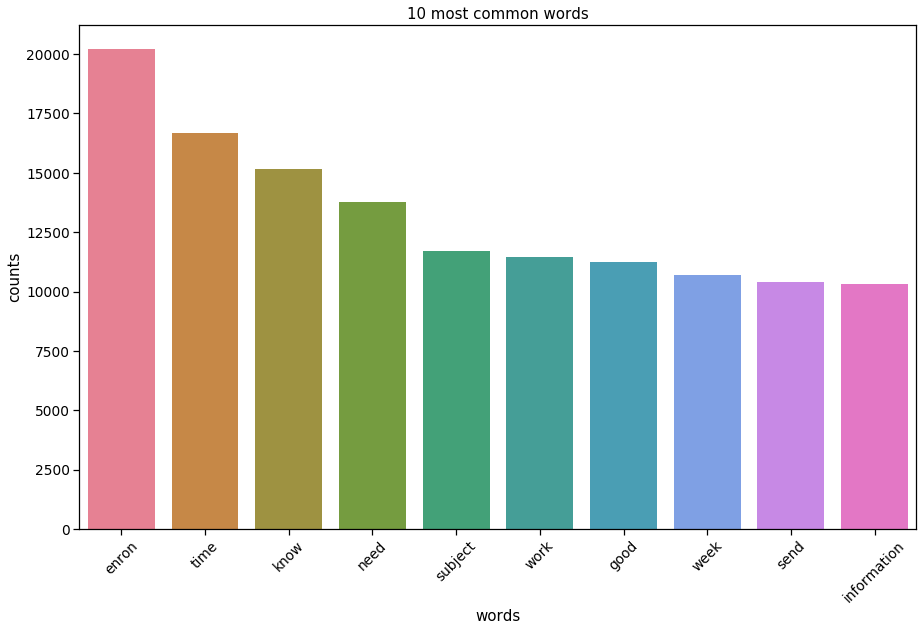

In [24]:
plot_10_most_common_words(count_data, count_vectorizer)